# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Sanchez, Jezreel John \
_Student No._: 2019-06919\
_Section_: HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 07 December 2023; 12:36 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jezreel John C. Sanchez

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

In [3]:
# Importing necessary packages
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Setting seed
seed=69420
rand.seed(seed)

# Side length of magnet
N=20

# Interaction constant J
J=1

# Temperature T in units where kb is 1
T=1

# Boltzmann constant kb
kb=1

# Defining function that creats the array of spins in the magnet
def create_magnet_array(N1=N, N2=N, chance_down=0.5):
  """
  Creates an N1 by N2 array that contains the spin for each site. The chance of
  getting a spin down in a particular site is chance_down.
  """
  # Defining array containing spin for each site
  magnet_array = np.ones([N1,N2], int)

  # Loop that gives us a random distribution of spins for magnet_array
  for i in range(N1):
    for j in range(N2):
      if rand.random()<chance_down:
        magnet_array[i][j] = -1

  return magnet_array

magnet_array = create_magnet_array(chance_down=0.5)

print(f"Array of spins in magnet: \n {magnet_array}\n")
print(f"Magnetization: {np.sum(magnet_array)}")




Array of spins in magnet: 
 [[ 1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1]
 [ 1 -1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1]
 [-1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1]
 [-1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1]
 [-1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1]
 [ 1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1]
 [-1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1  1]
 [-1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1]
 [ 1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1]
 [-1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1]
 [-1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1]
 [-1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1]
 [ 1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1]
 [ 1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1]
 [-1 -1  1 -1 -1 -1  1 -1  

In [4]:
# Defining function that computes energy E of the configuration
def E_mag(array=magnet_array, _J=J):
  """
  Computes energy of configuration. Only works for rectangular arrays larger than 2 by 2.
  """
  # Vertical length of array
  N1 = len(array)

  # Horizontal length of array
  N2 = len(array[0])

  # Initializing sum_vertical and sum_horizontal
  sum_vertical = np.zeros(N1)
  sum_horizontal = np.zeros(N2)

  # We multiply the row of spins to the row of spins below it to get the s1s2 product for spins vertical to one another.
  #We don't double up since each row we multiply is a unique pair.
  for i in range(N1-1): # This runs from 0 to N-2 inclusive. Going until N-1 inclusive makes the product go out of bounds since there's no next row
    sum_vertical += array[i]*array[i+1]

  # Here, we multiply spins horizontally adjacent to one another we use a trick that lets us do this in array form
  # This loop runs for every row on the array of spins
  for i in range(N1):
    # This is the crux of the trick, which is explained below
    #We initialize the shifted array
    array_shift = np.zeros(N2)

    # This loop creates the special array we need
    for j in range(N2-1): # This lets us leave out the last column since it needs to be zero anyway, as shown in the text below
      array_shift[j] = array[i][j]

    sum_horizontal += array[i]*array_shift

  # Now, we sum all the s1s2 products from both arrays and use array properties in Python to calculate the energy E
  E = -J*(np.sum(sum_vertical+sum_horizontal))

  return E



Trick for multiplying horizontally adjacent spins

We take advantage of the array product properties using

\\[\begin{bmatrix} a & b & c & d & e \end{bmatrix} \\ \times \begin{bmatrix} b & c & d & e & 0 \end{bmatrix} \\ =\begin{bmatrix} ab & bc & cd & de & 0 \end{bmatrix}\\]

Since we'll be summing the entries at the end, the zero wont matter, and we have the luxury of preserving the size of the array, which lets us add this to the sum_vertical array.

In [5]:
# In defining E_mag, we took advantage of the following properties of arrays
#in Python

array1 = np.array([[1,2,3]
                   ,[4,5,6]])

array2 = np.array([[2,4,6]
                   ,[8,10,12]])

print(f"array1:\n {array1}")
print()
print(f"array2:\n {array2}\n")
print(f"Product: \n {array1*array2}")
print()
print(f"Sum: \n {array1+array2}")
print(f"\n This adds all the entries inside array1:\n np.sum(array1) = {np.sum(array1)}")

array1:
 [[1 2 3]
 [4 5 6]]

array2:
 [[ 2  4  6]
 [ 8 10 12]]

Product: 
 [[ 2  8 18]
 [32 50 72]]

Sum: 
 [[ 3  6  9]
 [12 15 18]]

 This adds all the entries inside array1:
 np.sum(array1) = 21


In [6]:
# Here is our computed energy E
E = E_mag(array=magnet_array)

print(f"Energy of configuration: {E}")

Energy of configuration: -374.0


In [7]:
# Here, we do a Metropolis-style simulation
def sim_Metropolis(array=magnet_array, the_seed=seed, boltzmann=kb, temp=T, steps=10, \
                   use_Ediff=False, use_final_array=False, use_print=False, use_Mag_array=False, **kwargs):
  """
  Given array, the array of spins, and a seed the_seed, outputs Energy of the system
  after a steps amount of steps. Can also output Energy difference from initial Energy.

  boltzmann gives the Boltzmann constant used (changes based on how you define your units)

  temp gives temperature.

  use_dE changes output to change in energy from initial state to final state.

  use_final_array changes output to array of spins at final state
  """
  rand.seed(the_seed)

  # Vertical length of array
  N1 = len(array)

  # Horizontal length of array
  N2 = len(array[0])

  # Energy of current state
  E_first = E_mag(array=array)

  E_now = E_first

  # Configuration array of current state
  array_now = np.copy(array) # Using np.copy() makes it so that changing this doesn't change array

  for step in range(steps):
    # Creating Candidate for next state (We'll accept or reject this depending on Eq. 10.60)
    # Initizling next state array_next
    array_next = np.copy(array_now)

    # Selecting random site
    row=rand.randrange(N1)
    column=rand.randrange(N2)

    # Flipping the spin of a random site
    array_next[row][column] = -1*array_next[row][column]

    # Initializing candidate for next energy E_next
    E_next = E_mag(array=array_next)
    # Change in Energy
    dE = E_next - E_now

    # We implement Eq. 10.60 (balance equation) here
    if dE <= 0:
      # Transition to E_next and array_next if dE is negative or zero
      E_now = E_next
      array_now = array_next

    else:
      # Transition to E_next and array_next with probability np.exp(-(dE)/(boltzmann*temp)) if dE is positive
      if rand.random() < np.exp(-(dE)/(boltzmann*temp)):
        E_now = E_next
        array_now = array_next

        # We don't need to add an else statement since E_now and array_now are among our outputs

        # We don't do anything to E_now and array_now in this case


  # This series of conditionals determines if we output energy difference,
  #E_now, array at final state, the Magnetization array, or a print summarizing
  #results
  if use_print == True:
    print(f"Initial Energy: {E_first}\nFinal Energy: {E_now}\nEnergy difference: {E_now - E_first}\nNumber of steps: {steps}\n")
    print(f"Final State:\n {array_now}\n")
  elif use_Ediff == True:
    return (E_now - E_first)

  elif use_final_array == True:
    return array_now
  else:
    return E_now

sim_Metropolis(array=magnet_array, use_print=True, steps=1000)





Initial Energy: -374.0
Final Energy: -602.0
Energy difference: -228.0
Number of steps: 1000

Final State:
 [[ 1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1]
 [ 1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1 -1]
 [ 1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1]
 [ 1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1]
 [ 1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1]
 [ 1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1]
 [ 1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1]
 [ 1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1]
 [-1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1]
 [-1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1]
 [ 1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1]
 [-1 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1]
 [-1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1]
 [-1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1]
 [-1  1  1 

In [8]:
# Number of steps
step = 1000000

# Simulation at 1 milion steps
sim_Metropolis(array=magnet_array, use_print=True, steps=step)

Initial Energy: -374.0
Final Energy: -690.0
Energy difference: -316.0
Number of steps: 1000000

Final State:
 [[ 1  1 -1 -1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1]
 [-1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1]
 [ 1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1]
 [ 1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1]
 [ 1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1]
 [ 1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1]
 [ 1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1]
 [ 1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1]
 [ 1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1]
 [ 1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1]
 [ 1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1]
 [ 1 -1 

We can see here that the energy difference tends towards some negative number. This is not surprising given the nature of Equation 10.60, the probability of acceptance:

\\[P_{a} = \begin{cases} 1 & \text{if } (E_{next} - E_{now}) ≤ 0\\ exp(-\frac{E_{next}-E_{now}}{k_b T}) & \text{if } (E_{next} - E_{now}) > 0 \end{cases} \\]

Here, we can see that there is a preference for the energy difference between the next state and the previous one to be negative, or for the next state to be at a lower energy compared to the previous one (the first case of \\(P_a\\) introduces this heavy preference) even in the midst of some random fluctuations (whose probabilities are dictated by \\(exp(-\frac{E_{next}-E_{now}}{k_b T})\\), the second case).

Typically, we can expect a ferromagnetic material to eventually converge to either a positive or a negative net magnetization, that is, adjacent spins try to make each other the same spin.

In [20]:
# Number of steps
step = 1000000

# I'll reuse most of the sim_Metropolis() code here. Putting magnetization functionality to sim_Metropolis makes Google Colab run out of memory
def sim_Mag(array=magnet_array, the_seed=seed, boltzmann=kb, temp=T, steps=10, **kwargs):
  """
  Given array, the array of spins, and a seed the_seed, outputs Energy of the system
  after a steps amount of steps. Can also output Energy difference from initial Energy.

  boltzmann gives the Boltzmann constant used (changes based on how you define your units)

  temp gives temperature
  """
  rand.seed(the_seed)

  # Vertical length of array
  N1 = len(array)

  # Horizontal length of array
  N2 = len(array[0])

  # Energy of current state
  E_first = E_mag(array=array)

  E_now = E_first

  # Magnetization Array
  Mag_array = []
  Mag_array.append(np.sum(array))

  # Configuration array of current state
  array_now = np.copy(array) # Using np.copy() makes it so that changing this doesn't change array

  for step in range(steps):
    # Creating Candidate for next state (We'll accept or reject this depending on Eq. 10.60)
    # Initizling next state array_next
    array_next = np.copy(array_now)

    # Selecting random site
    row=rand.randrange(N1)
    column=rand.randrange(N2)

    # Flipping the spin of a random site
    array_next[row][column] = -1*array_next[row][column]

    # Initializing candidate for next energy E_next
    E_next = E_mag(array=array_next)
    # Change in Energy
    dE = E_next - E_now

    # We implement Eq. 10.60 (balance equation) here
    if dE <= 0:
      # Transition to E_next and array_next if dE is negative or zero
      E_now = E_next
      array_now = array_next

      # Append Magnetization of new state to Mag_array
      Mag_array.append(np.sum(array_now))

    else:
      # Transition to E_next and array_next with probability np.exp(-(dE)/(boltzmann*temp)) if dE is positive
      if rand.random() < np.exp(-(dE)/(boltzmann*temp)):
        E_now = E_next
        array_now = array_next

        # Append Magnetization of new state to Mag_array
        Mag_array.append(np.sum(array_now))

      else:
        # Append Magnetization of new state to Mag_array
        Mag_array.append(np.sum(array_now))

        # We don't do anything to E_now and array_now in this case

  else:
    return Mag_array

# Magnetization for 1 milion steps
Mag_array = sim_Mag(array=magnet_array, steps=step)


print(f"Steps:{step}\nMagnetization of Final State:\n {Mag_array[-1]}")


Steps:1000000
Magnetization of Final State:
 8


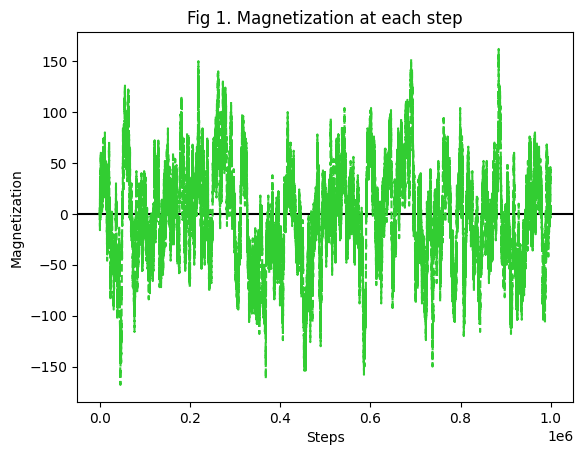

In [25]:
# PLOTTING

# Time array (measured in steps)
t_array = np.linspace(start=0, stop=step, num=step+1)

#Plot settings function
def plot_settings(figure, axes, x,y, xlabel="x", ylabel="y", color="blue", title="", \
                  use_xlimit=False, use_ylimit=False, xlim1=0, xlim2=100, ylim1=-10, ylim2=10, \
                  marker="o", markersize=5, linestyle="--", label="", **kwargs):
  """
  Plots specified arrays.

  xlabel and ylabel sets the labels of the respective axes.
  use_xlimit/use_ylimit toggles whether or not plt.xlim()/plt.ylim would be used, where xlim1/ylim1 and
  xlim2/ylim2 are its parameters.
  """
  axes.plot(x,y, marker=marker, markersize=markersize, linestyle=linestyle, color=color, label=label)

  plt.title(title)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)

  # These if statements are for incase we want to change the limits of the graph
  if use_xlimit == True:
   plt.xlim(xlim1, xlim2)
   if use_ylimit == True:
     plt.ylim(ylim1, ylim2)

  if use_ylimit == True:
    plt.ylim(ylim1, ylim2)
    if use_xlimit == True:
      plt.xlim(xlim1, xlim2)


fig, ax = plt.subplots()

plt.axhline(0., color='black', linestyle='solid')

plot_settings(fig,ax,t_array,Mag_array, xlabel="Steps", ylabel="Magnetization", \
              color="limegreen", title="Fig 1. Magnetization at each step", markersize=0.00001, linestyle="--")


plt.show()


In [34]:
# What if we make it so that our lattice has, on average, a more negative initial magentization?
rand.seed(seed)
# Creating new lattice neg_magnet_array
neg_magnet_array = create_magnet_array(chance_down=0.8)

print(f"Array of spins in magnet: \n {neg_magnet_array}\n")
print(f"Magnetization: {np.sum(neg_magnet_array)}")

Array of spins in magnet: 
 [[-1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]
 [-1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1]
 [-1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1]
 [ 1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1]
 [-1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1  1 -1 -

In [36]:
# Number of steps
step = 1000000

# Simulation at 1 milion steps
sim_Metropolis(array=neg_magnet_array, use_print=True, steps=step)

Initial Energy: -502.0
Final Energy: -662.0
Energy difference: -160.0
Number of steps: 1000000

Final State:
 [[ 1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1]
 [-1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1]
 [-1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1]
 [-1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1  1]
 [ 1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1]
 [ 1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1]
 [ 1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1]
 [ 1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1]
 [ 1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1]
 [ 1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1]
 [ 1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1]
 [ 1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1]
 [ 1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1]
 [ 1  1 

In [38]:
# Magnetization for 1 milion steps (starting with significant net negative magnetization)
neg_Mag_array = sim_Mag(array=neg_magnet_array, steps=step)

print(f"Steps:{step}\nMagnetization of Final State:\n {neg_Mag_array[-1]}")


Steps:1000000
Magnetization of Final State:
 94


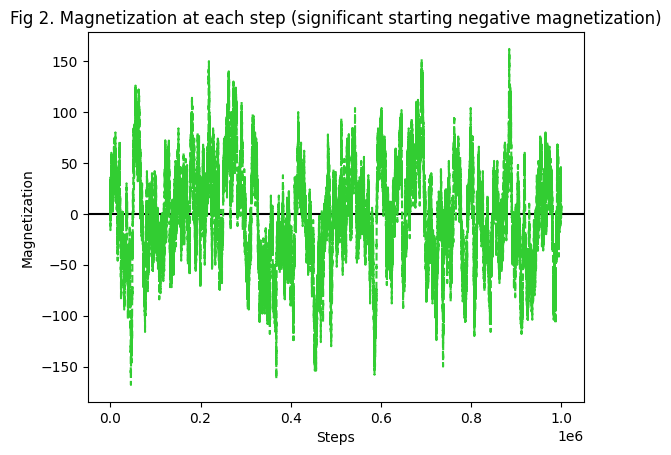

In [41]:
# PLOTTING Fig2

fig2, ax2 = plt.subplots()

plt.axhline(0., color='black', linestyle='solid')

plot_settings(fig2,ax2,t_array,Mag_array, xlabel="Steps", ylabel="Magnetization", \
              color="limegreen", title="Fig 2. Magnetization at each step (significant starting negative magnetization)", markersize=0.00001, linestyle="--")


plt.show()


In [42]:
# What if we make it so that our lattice has, on average, a more postive initial magentization?
rand.seed(seed)
# Creating new lattice pos_magnet_array
pos_magnet_array = create_magnet_array(chance_down=0.2)

print(f"Array of spins in magnet: \n {pos_magnet_array}\n")
print(f"Magnetization: {np.sum(pos_magnet_array)}")

Array of spins in magnet: 
 [[ 1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1]
 [ 1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]
 [-1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1]
 [-1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1]
 [ 1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1]
 [ 1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1]
 [ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1]
 [-1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1]
 [ 1  1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1]
 [ 1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1]
 [ 1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1]
 [-1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1]
 [-1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1]
 [ 1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1]
 [-1 -1  1  1 -1  1  1 -1  

In [43]:
# Number of steps
step = 1000000

# Simulation at 1 milion steps
sim_Metropolis(array=pos_magnet_array, use_print=True, steps=step)

Initial Energy: -486.0
Final Energy: -678.0
Energy difference: -192.0
Number of steps: 1000000

Final State:
 [[-1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1]
 [-1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1]
 [-1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1]
 [ 1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1]
 [ 1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1]
 [ 1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1]
 [ 1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1]
 [ 1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1]
 [ 1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1]
 [ 1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1]
 [ 1 -1 

In [44]:
# Magnetization for 1 milion steps (starting with significant net positive magnetization)
pos_Mag_array = sim_Mag(array=pos_magnet_array, steps=step)

print(f"Steps:{step}\nMagnetization of Final State:\n {pos_Mag_array[-1]}")

Steps:1000000
Magnetization of Final State:
 -2


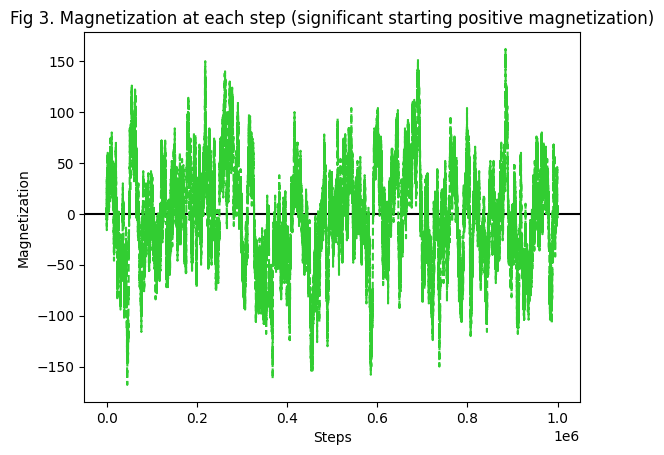

In [46]:
# PLOTTING Fig3

fig3, ax3 = plt.subplots()

plt.axhline(0., color='black', linestyle='solid')

plot_settings(fig3,ax3,t_array,Mag_array, xlabel="Steps", ylabel="Magnetization", \
              color="limegreen", title="Fig 3. Magnetization at each step (significant starting positive magnetization)", markersize=0.00001, linestyle="--")


plt.show()

We can see in Fig 1 that our ferromagnetic material does indeed exhibit spontaneous magnetism given that it doesn't settle on a net zero magnetism even in the absence of an external magnetic field. We can see this from the continued fluctuations of the magnetization despite running our simulation for a million steps.

While the system in Fig 1 does end with a net positive magnetization, we can see from the graph that the magnetization doesn't settle to a particular positive or negative value, continuously fluctuating.

This is further supported by the fact that even with a significant starting negative magnetization or a significant positive magnetization, the magnetization still doesn't appear to converge to a particular positive or negative value. The presence of plentiful peaks in Fig 1, Fig 2 and Fig 3 tells us that we are more likely to end up with a non-zero net magnetization after a million steps.